<a href="https://colab.research.google.com/github/OwinoMichael/Compiler-Construction-Group-Work/blob/main/Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MINI-PROJECT

COMPILER CONSTRUCTION GROUP MEMBERS( ICS 4C)

106731-Raphael Oluoch

100701-Kelong Zacharia

120921-Owino Michael

122287-Oduor Michael Owen

A string tokenizer class is type of class that allows an application to break a string into tokens. A token is a maximum sequence of consecutive characters of strings that are not delimiters. An example of a token of the string is: "I am a student of Compiler Construction." 

The tokens are: "I", "am", "a", "student", "of", "Compiler", "Construction".

A StringTokenizer has got both methods i.e String nextToken()  and constructors i.e String str among others.

Below is diagramatical represenation of how the stringTokenizer works:

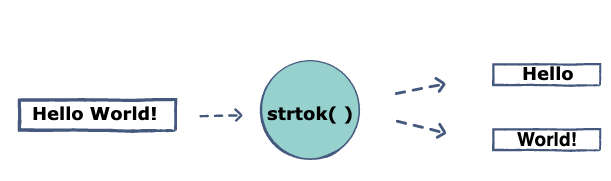

Below is a sample code. It is C source code for string tokenizer class. The class is used to split strings into tokens.

main.cpp

In [ ]:
#include <iostream>
using std::cout;
using std::endl;
using std::cin;
using std::auto_ptr;
#include "StringTokenizer.hpp"

int main(int argc, char* argv[]) {
short int x;
string strTest = "This is a test string for the tokenizer  ";
auto_ptr<StringTokenizer> tokTokenizer(new StringTokenizer(strTest, " ", false));

	// shows the tokenizer at work
	cout << "Number of Tokens:\t" << tokTokenizer->CountTokens() << endl;
	cout << "Peeked this Token:\t" << tokTokenizer->PeekNextToken() << endl;
	cout << "All Elements:" << endl;
	for (x = 0; tokTokenizer->HasMoreTokens(); x++) {
		cout << "\tToken #" << x << ":  " << tokTokenizer->NextToken() << endl;
	}

	// switching the string now
	cout << "\nSwitching string...in progress..." << endl;
	strTest=" Here's one with space in front and back ";
	tokTokenizer->SwitchString(strTest, " ", false);

	// exporting the tokenizer's tokens
	cout << "Exporting tokens...in progress..." << endl;
	std::vector<string> tokLocalExport;
	tokLocalExport = tokTokenizer->GetVector();

	// printing what was exported to show it was successful
	cout << "\nPrinting what was exported..." << endl;
	cout << "All Elements:" << endl;
	for (x = 0; x < tokLocalExport.size(); x++) {
		cout << "\tToken #" << x << ":  " << tokLocalExport[x] << endl;
	}

	// note of the user
	cout << "\n\nNOTE:\nIf you wanted to get the delimiter(space in this case) all you would have to do is set the third argument to true instead of false. Enjoy!" << endl;

	return EXIT_SUCCESS;
}

StringTokenizer.cpp

In [ ]:
#include <iostream>
#include "StringTokenizer.hpp"

StringTokenizer::StringTokenizer(string& strText) {
	SwitchString(strText);
	intSpot = 0;

	GenerateTokens();
}

StringTokenizer::StringTokenizer(string& strText, char* strDelim) {
	SwitchString(strText, strDelim);
	intSpot = 0;

	GenerateTokens();
}

StringTokenizer::StringTokenizer(string& strText, char* strDelim, bool blnDelimAsToken) {
	SwitchString(strText, strDelim, blnDelimAsToken);
	intSpot = 0;

	GenerateTokens();
}

const int StringTokenizer::CountTokens() const {
	return vecTokens.size();
}

const bool StringTokenizer::HasMoreTokens() const {
	if (intSpot < CountTokens()) return true;
	else if (intSpot == CountTokens()) return false;
}

const string& StringTokenizer::PeekNextToken() const {
	return vecTokens[intSpot+1];
}

const string& StringTokenizer::NextToken() {
	intSpot++;
	return vecTokens[intSpot-1];
}

void StringTokenizer::SwitchString(string& strText, char* strDelim, bool blnDelimAsToken) {
	strBuffer = strText;
	strDelimiter = strDelim;
	blnIncludeDelim = blnDelimAsToken;
	intSpot = 0;

	GenerateTokens();
}

const std::vector<string>& StringTokenizer::GetVector() const {
	return vecTokens;
}

void StringTokenizer::GenerateTokens() {
std::string::size_type intPrevDelimPos = 0;
std::string::size_type intNextDelimPos;
string strBuffer2;

	while(1) {
		// find the next delimiter
		intNextDelimPos = strBuffer.find(strDelimiter, intPrevDelimPos);

		// get the token
		if (intNextDelimPos != string::npos) {
			strBuffer2 = strBuffer.substr(intPrevDelimPos, intNextDelimPos - intPrevDelimPos);
		} else if (intNextDelimPos == string::npos) {
			// last token
			strBuffer2 = strBuffer.substr(intPrevDelimPos, (strBuffer.length() + 1) - intPrevDelimPos);
		}

		// add delimiter to vector if needed
		if (blnIncludeDelim == true) {
			/* if the current character is the delimiter/token take
			 * no action because delimiter will be added on the
			 * following loop anyway */
			if (strBuffer.substr(intPrevDelimPos, strDelimiter.length()) == strDelimiter) {
				intPrevDelimPos = intNextDelimPos + strDelimiter.length();
				continue;
			} else if (strBuffer.substr(0, strDelimiter.length()) != strDelimiter && intPrevDelimPos == 0) {
				/* don't add an uneeded delimiter
				 * at the front of the string */
			} else if (strBuffer2 == "") {
				/* this will avoid the error that happens when
				 * the delimiter is at the end of the string */
				strBuffer2 = strDelimiter;
			} else vecTokens.push_back(strDelimiter);
		} else if (blnIncludeDelim == false) {
			if (strBuffer2 == "") {
				/* ensures weird activity(blank elements, 
				 * infinite loop) won't happen when delimiters
				 * are added to the front or back fo the string 
				 * and not the middle. */
				intPrevDelimPos = intNextDelimPos + strDelimiter.length();
 				if(intPrevDelimPos == strBuffer.length()) break;
				continue;
			}
		}

		// add token to vector
		vecTokens.push_back(strBuffer2);

		// set variable for next loop
		intPrevDelimPos = intNextDelimPos + strDelimiter.length();

		// end loop if all tokens have been found already
		if (intNextDelimPos == string::npos) break;
		else if(intPrevDelimPos == strBuffer.length()) break;
	}
}

**References**

www.techonthenet.com. (n.d.). C Language: strtok function (Search String for Token). https://www.techonthenet.com/c_language/standard_library_functions/string_h/strtok.php

C String Tokenizer. (n.d.). https://www.roseindia.net/c-tutorials/c-string-tokenizer.shtml